<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Attrition 데이터를 대상으로 모델링를 진행합니다.
- 클래스 불균형 상태를 확인하고 다양한 방법으로 해결을 시도합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition2.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1


In [4]:
# 하위 몇 개 행 확인
data.tail()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
1145,0,33,Research & Development,1,2,Life Sciences,Female,Research Director,4,Single,13458,1,3,15,1,3,15
1146,0,36,Research & Development,24,4,Life Sciences,Female,Laboratory Technician,2,Married,5674,7,3,11,3,3,9
1147,0,40,Research & Development,6,3,Life Sciences,Female,Manufacturing Director,3,Single,13237,7,3,22,3,3,20
1148,0,43,Human Resources,2,3,Life Sciences,Male,Human Resources,4,Single,3539,0,2,10,5,3,9
1149,0,32,Sales,8,2,Technical Degree,Female,Sales Executive,2,Married,5228,1,4,13,2,3,13


In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1150 non-null   int64 
 1   Age                       1150 non-null   int64 
 2   Department                1150 non-null   object
 3   DistanceFromHome          1150 non-null   int64 
 4   Education                 1150 non-null   int64 
 5   EducationField            1150 non-null   object
 6   Gender                    1150 non-null   object
 7   JobRole                   1150 non-null   object
 8   JobSatisfaction           1150 non-null   int64 
 9   MaritalStatus             1150 non-null   object
 10  MonthlyIncome             1150 non-null   int64 
 11  NumCompaniesWorked        1150 non-null   int64 
 12  RelationshipSatisfaction  1150 non-null   int64 
 13  TotalWorkingYears         1150 non-null   int64 
 14  TrainingTimesLastYear   

0    1050
1     100
Name: Attrition, dtype: int64


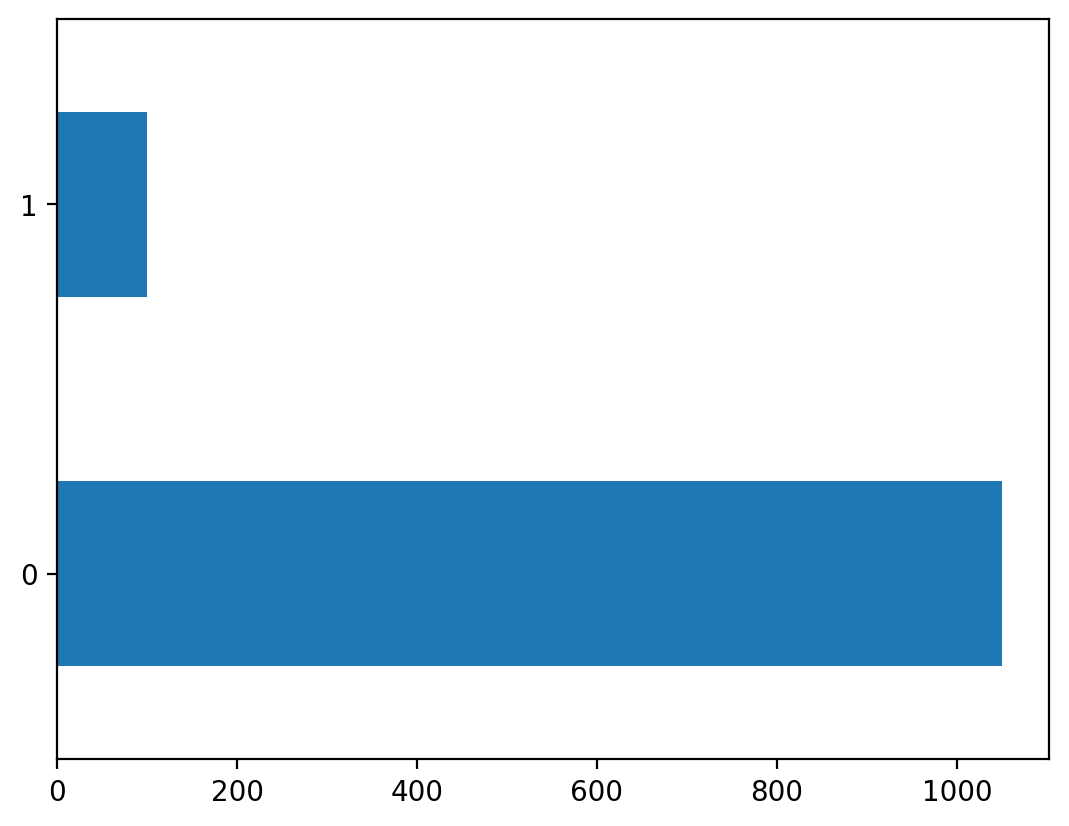

In [6]:
# Target 확인
print(data['Attrition'].value_counts())

# 시각화
data['Attrition'].value_counts().plot(kind='barh')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 가변수화**

In [7]:
# 가변수화
dumm_cols = ['Education', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction',
             'MaritalStatus', 'RelationshipSatisfaction', 'WorkLifeBalance'] 
data = pd.get_dummies(data, columns=dumm_cols, drop_first=True) 

**2) x, y 분리**

In [8]:
# target 확인
target = 'Attrition'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**3) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 우선 회귀 문제인지 분류 문제인지 명확히 구분합니다.

## 4.1.기본 모델링

- 원본 데이터를 사용해 Random Forest 알고리즘으로 모델링합니다.

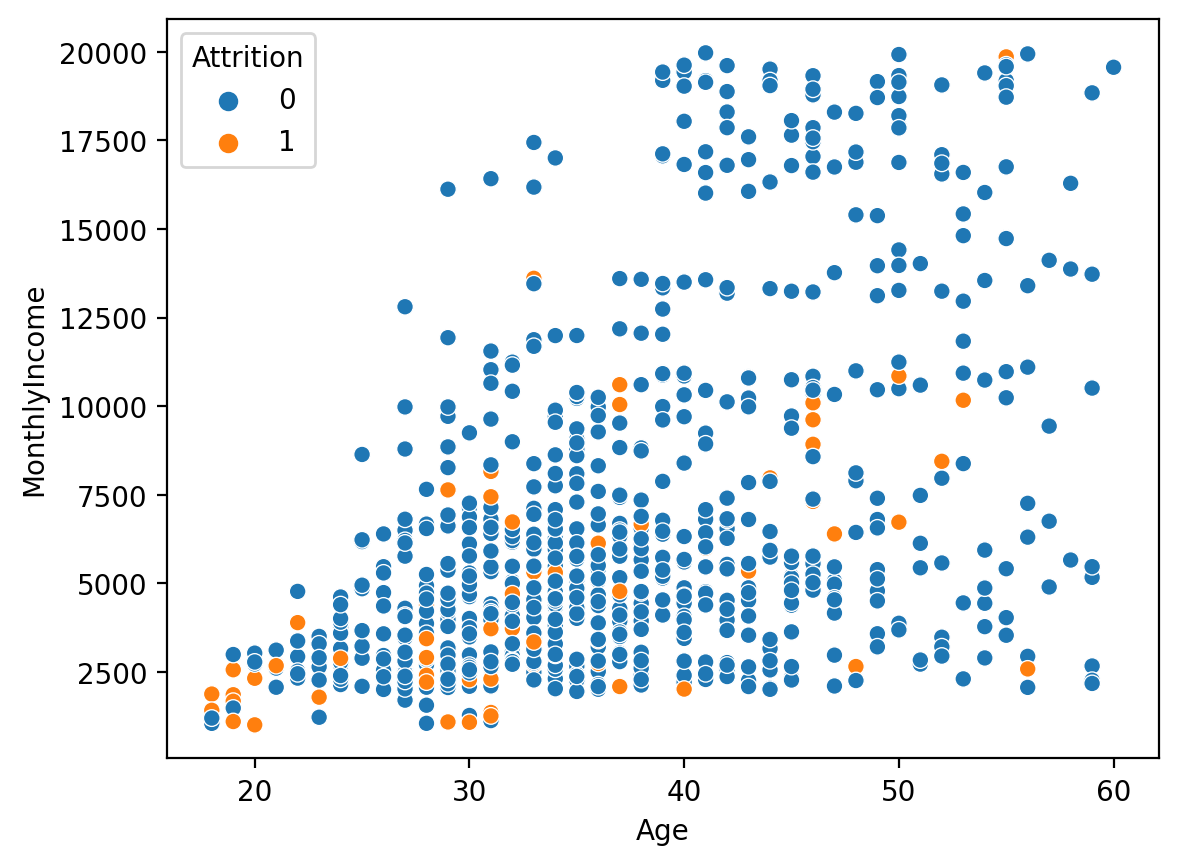

In [10]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=y_train, data=x_train)
plt.show()

In [11]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[317   1]
 [ 26   1]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       318
           1       0.50      0.04      0.07        27

    accuracy                           0.92       345
   macro avg       0.71      0.52      0.51       345
weighted avg       0.89      0.92      0.89       345



- Accuracy(정확도)는 높지만 Target 값 1에 대한 Recall(재현율, 민감도)이 매우 낮습니다.
- 전체 데이터 중에서 Target 값이 1인 데이터가 매우 적기 때문입니다.
- 이러한 현상을 **클래스 불균형** 이라고 합니다.
- 실무에서는 Accuracy가 낮아지더라도 1에 대한 Recall을 높여야 할 경우가 종종 있습니다.
- 이를 위해 **Under Sampling** 또는 **Over Sampling** 을 사용합니다.

## 4.2.Under Sampling

- Under Sampling 후 모델 성능을 확인합니다.

**1) Under Sampling**

- RandomUnderSampler를 사용해 Under Sampling 합니다.

In [ ]:
# imblearn 설치
#!pip install imbalanced-learn

In [12]:
# 불러오기
from imblearn.under_sampling import RandomUnderSampler

# Under Sampling
under_sample = RandomUnderSampler()
u_x_train, u_y_train = under_sample.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(u_y_train))

전: [732  73]
후: [73 73]


**2) 학습 데이터 분포 확인**

- 시각화해서 Resampling 된 학습 데이터 분포를 확인합니다.

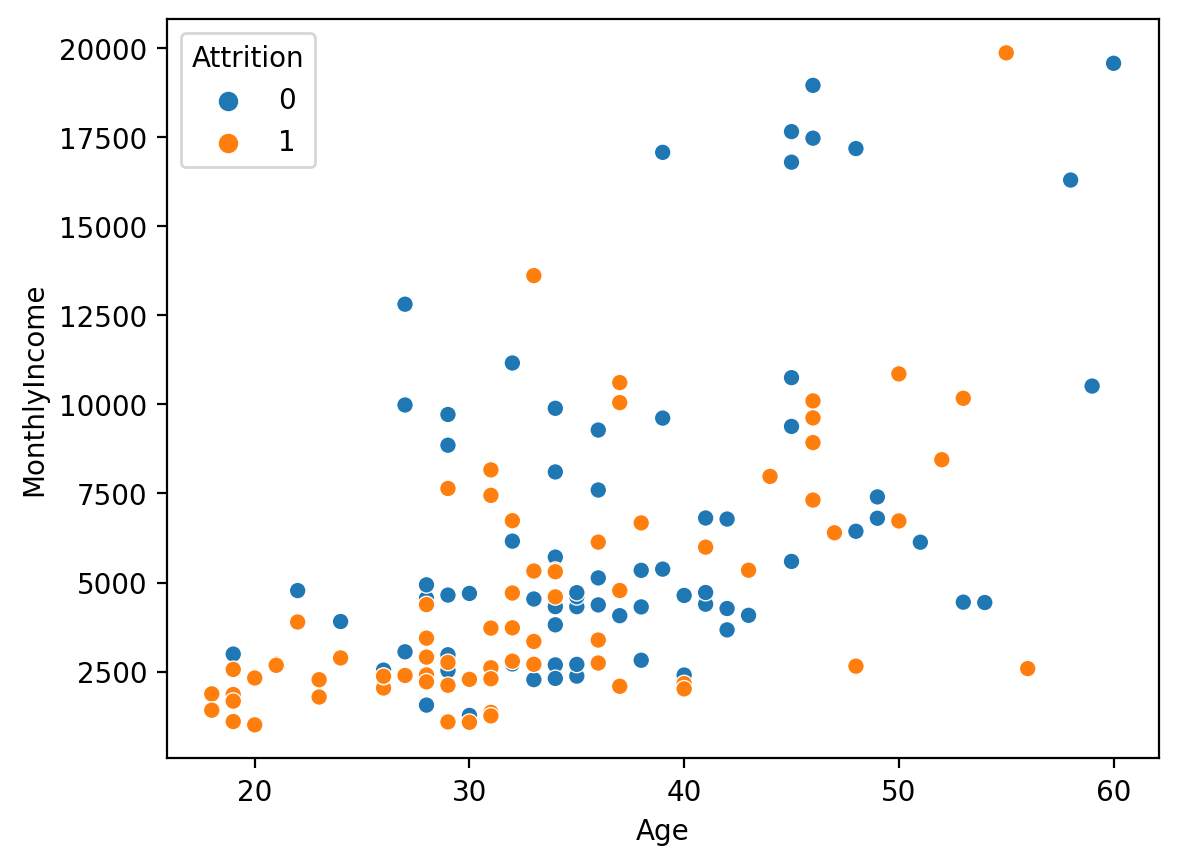

In [13]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=u_y_train, data=u_x_train)
plt.show()

**3) 모델 성능 확인**

- 다시 모델링해 성능을 확인합니다.

In [14]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(u_x_train, u_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[224  94]
 [ 11  16]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       318
           1       0.15      0.59      0.23        27

    accuracy                           0.70       345
   macro avg       0.55      0.65      0.52       345
weighted avg       0.89      0.70      0.77       345



## 4.3.Over Sampling #1

- Over Sampling 후 모델 성능을 확인합니다.

**1) Over Sampling**

- RandomOverSampler를 사용해 Over Sampling 합니다.

In [15]:
# 불러오기
from imblearn.over_sampling import RandomOverSampler

# Over Sampling
over_sample = RandomOverSampler()
o_x_train, o_y_train = over_sample.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(o_y_train))

전: [732  73]
후: [732 732]


**2) 학습 데이터 분포 확인**

- 시각화해서 Resampling 된 학습 데이터 분포를 확인합니다.

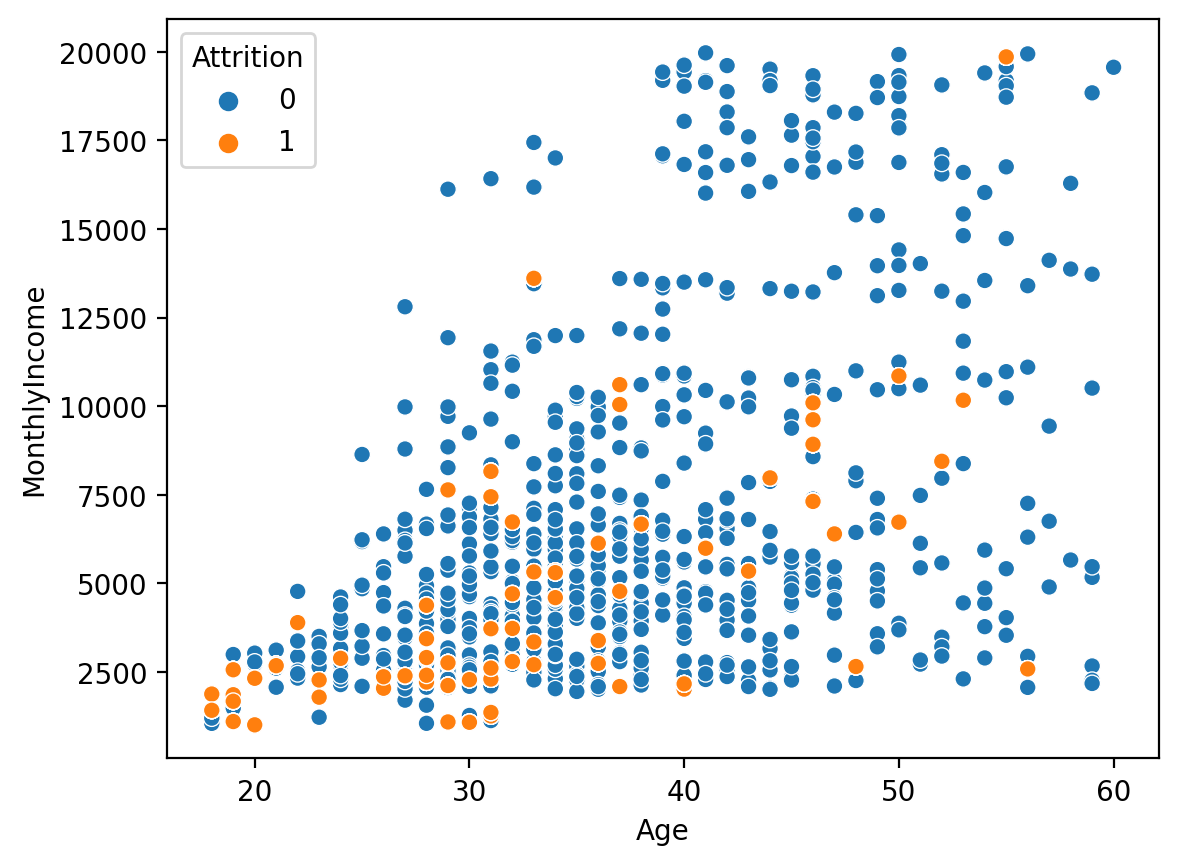

In [16]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=o_y_train, data=o_x_train)
plt.show()

**3) 모델 성능 확인**

- 다시 모델링해 성능을 확인합니다.

In [17]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(o_x_train, o_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[291  27]
 [ 16  11]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       318
           1       0.29      0.41      0.34        27

    accuracy                           0.88       345
   macro avg       0.62      0.66      0.63       345
weighted avg       0.90      0.88      0.88       345



## 4.4.Over Sampling #2

- Over Sampling 후 모델 성능을 확인합니다.

**1) Over Sampling**

- SMOTE를 사용해 Over Sampling 합니다.

In [18]:
# 불러오기
from imblearn.over_sampling import SMOTE

# Over Sampling
smote = SMOTE()
s_x_train, s_y_train = smote.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(s_y_train))

전: [732  73]
후: [732 732]


**2) 학습 데이터 분포 확인**

- 시각화해서 Resampling 된 학습 데이터 분포를 확인합니다.

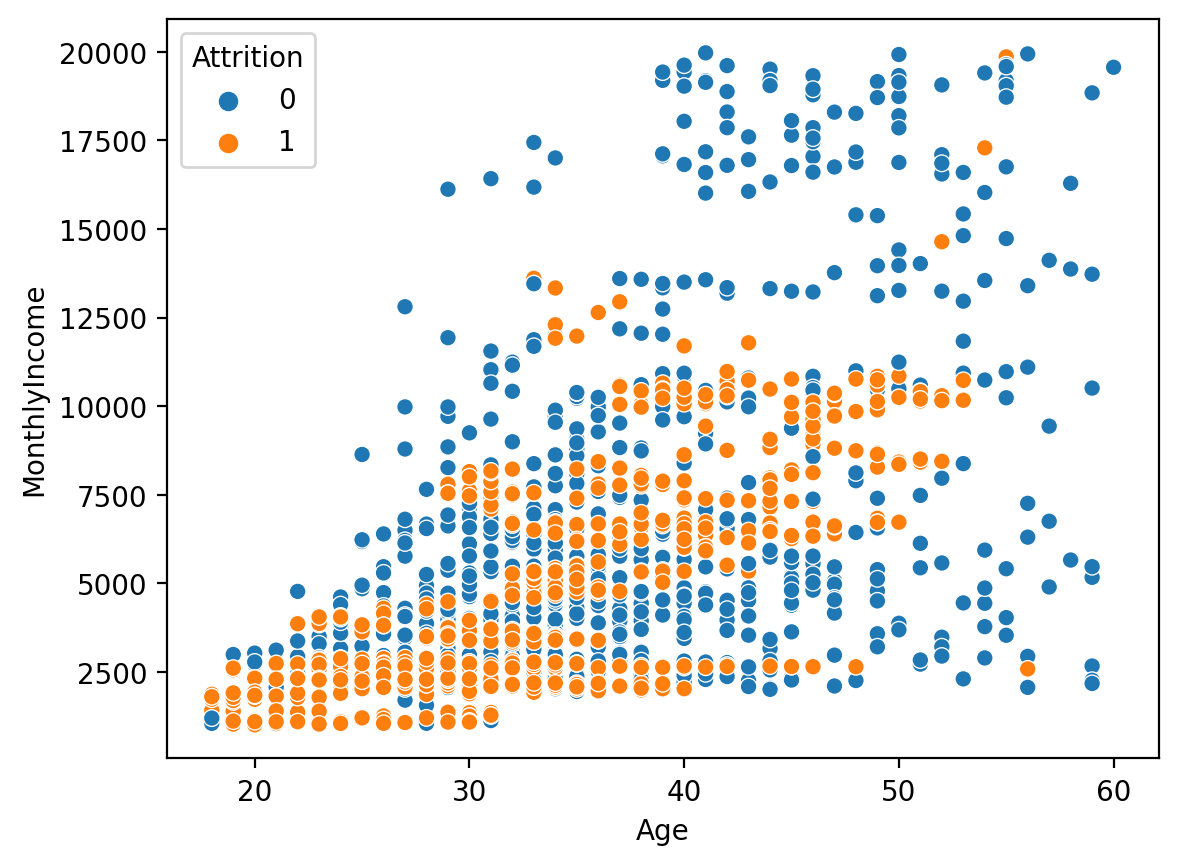

In [19]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=s_y_train, data=s_x_train)
plt.show()

**3) 모델 성능 확인**

- 다시 모델링해 성능을 확인합니다.

In [20]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(s_x_train, s_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[301  17]
 [ 20   7]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       318
           1       0.29      0.26      0.27        27

    accuracy                           0.89       345
   macro avg       0.61      0.60      0.61       345
weighted avg       0.89      0.89      0.89       345



## 4.5.Class Weight

- class_weight 하이퍼파라미터를 설정해 모델링한 후 성능을 확인합니다.

In [21]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1, class_weight='balanced')

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[302  16]
 [ 17  10]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       318
           1       0.38      0.37      0.38        27

    accuracy                           0.90       345
   macro avg       0.67      0.66      0.66       345
weighted avg       0.90      0.90      0.90       345

